# Actividad P1

Primera actividad de evaluación continua del curso en la que se practicarán los algoritmos básicos de categorización (clasificación no supervisada).

## Competencias

### Competencias de grado
* Capacidad para utilizar los fundamentos matemáticos, estadísticos y físicos y comprender los sistemas TIC.
* Capacidad para analizar un problema en el nivel de abstracción adecuado a cada situación y aplicar las habilidades y conocimientos adquiridos para abordarlo y resolverlo.
* Capacidad para conocer las tecnologías de comunicaciones actuales y emergentes y saber aplicarlas, convenientemente, para diseñar y desarrollar soluciones basadas en sistemas y tecnologías de la información.
* Capacidad para proponer y evaluar diferentes alternativas tecnológicas y resolver un problema concreto.

### Competencias específicas
* Capacidad para utilizar la tecnología de aprendizaje automático más adecuada para un determinado problema.
* Capacidad para evaluar el rendimiento de los diferentes algoritmos de resolución de problemas mediante técnicas de validación cruzada.

## Objetivos

El objetivo de esta prueba de evaluación es categorizar los datos de los archivos adjuntos relacionados con divorcios. Queremos, por tanto, agrupar los datos en función de si se corresponden con un divorcio o no.

## Descripción de la actividad de evaluación

Debéis resolver esta actividad en el propio cuaderno Jupyter que contiene el enunciado. Para ello, es imprescindible que utilicéis las celdas que se han dispuesto para las respuestas y que no creéis ninguna nueva ni eliminéis ninguna existente.

Algunas de estas celdas son *markdown*, para que podáis emplear texto formateado en Markdown. Otras celdas son de código, para que podáis incluir los programas en Python que se soliciten y ejecutarlos directamente en el cuaderno. Cuando entreguéis la actividad, todas las celdas de código deben estar debidamente ejecutadas.

Las bibliotecas que debéis emplear son muy comunes y fáciles de instalar. Por lo tanto, se recomienda que las instaléis. En el caso poco probable de que esto os genere algún problema, también podéis trabajar con Google Colab. Para ello, podéis utilizar la cuenta de Google de la UOC. En cualquier caso, es responsabilidad del estudiante gestionar la instalación de bibliotecas o, en su caso, entender el funcionamiento de Google Colab.

## Descripción de los datos

Los archivos proporcionados (LARGE.CSV y SMALL.CSV) contienen información sobre personas casadas y divorciadas en formato tabular, en el que cada fila es un ejemplo y corresponde a una persona. La última columna representa la clase (0: casado, 1: divorciado). El resto de columnas contienen las respuestas proporcionadas por cada persona a las preguntas de un cuestionario. El separador de columnas es el punto y coma (;). En el caso de LARGE.CSV, encontraréis las respuestas de 170 personas a 54 preguntas, mientras que en SMALL.CSV encontraréis las respuestas de 10 personas a 4 preguntas. Los datos contenidos en los archivos provienen del conjunto de datos *Divorce Predictors Data Set*, disponible en https://doi.org/10.24432/C53W5P

Cabe señalar que, aunque se puede (y se recomienda) consultar el significado de los atributos en el enlace anterior, no debéis trabajar con los archivos originales del conjunto de datos. Debéis trabajar con los que os proporcionamos: LARGE.CSV y SMALL.CSV. En cada ejercicio se os indicará con cuál de los dos archivos debéis trabajar.

### Ejercicio 1

Para realizar este ejercicio, no debéis utilizar un programa que lo resuelva; se espera que mostréis y justifiquéis cada uno de los pasos y cálculos realizados.

En este ejercicio, deberéis comprobar si es posible categorizar el archivo de datos pequeño (SMALL.CSV). En particular, se solicita:

---
**a) Realizad, si es necesario, el tratamiento previo de los datos. Justificad todas las decisiones que toméis. Mostrad el conjunto de datos tratado. En los apartados posteriores, cuando se hable de "SMALL.CSV", se entenderá que se refiere al resultado del tratamiento de datos resultante de este apartado.**

---

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving SMALL-1.CSV to SMALL-1 (1).CSV


In [ ]:
import pandas as pd

with open("SMALL-1.CSV", "r", encoding="utf-8") as f:
    data = pd.read_csv(f, sep=';')

data

,Atr11,Atr20,Atr39,Atr42,Class
0,3,4,4,4,1
1,4,4,4,4,1
2,0,0,0,1,0
3,3,2,4,4,1
4,3,4,3,4,1
5,0,0,0,4,0
6,1,0,0,2,0
7,1,0,0,1,0
8,0,0,0,0,0
9,4,3,4,3,1


Como podemos ver, partimos de un conjunto de datos de cuatro atributos (Atr11, Atr20, Atr39 y Atr42) y su variable de salida (Class), la cual indica si la persona está casada (0) o divorciada (1).

Dado que los datos están completos significa que no tenemos valores nulos y dado que no hay tampoco repeticiones significa que no hay registros duplicados. Por lo tanto, no es necesario ningún tipo de imputación ni eliminación previa.

Debemos analizar las estadísticas de cada atributo para más adelante realizar la estandarización o normalización según proceda. Para ello, necesitamos sus máximos y mínimos que simplemente se identifican visualizando los extremos de cada atributo, la media y desviación estándar a tra vés de sus fórmulas. Las cuales son:

Desviación estándar:
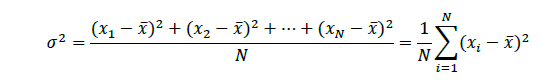

Media:

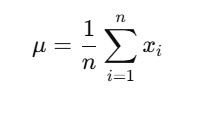


*   **Atr11**

*   Mínimo y Máximo: 0.0 y 4.0
*   Media: 1.90
*   Desviación estándar: 1.66

*   **Atr20**

*   Mínimo y Máximo: 0.0 y 4.0
*   Media: 1.70
*   Desviación estándar: 1.89

*   **Atr39**

*   Mínimo y Máximo: 0.0 y 4.0
*   Media: 1.90
*   Desviación estándar: 2.02

*   **Atr42**

*   Mínimo y Máximo: 0.0 y 4.0
*   Media: 2.70
*   Desviación estándar: 1.57

*   **Class**

*   Rango: 0 (casado) y 1 (divorciado)
*   Media: 0.5

Para decidir entre aplicar normalización o estandarización a cada atributo, vamos a analizar si los datos siguen una distribución normal a traves de la prueba de D'Agostino y Pearson, que calcula un estadístico y un p-valor.

Si el p-valor > 0.05 = estandarización.

Si el p-valor < 0.05 = normalización.

Estos resultados los obtendremos con ayuda de Python, para el cálculo estadístico y p-valor, pero la interpretación y aplicación es por cuenta propia.


In [ ]:
import pandas as pd
from scipy.stats import normaltest

# Prueba de normalidad de D'Agostino y Pearson
normality_results = {column: normaltest(data[column]) for column in data.columns[:-1]}
normality_results

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:418: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=10 observations were given.
  return hypotest_fun_in(*args, **kwds)


{'Atr11': NormaltestResult(statistic=np.float64(4.475996172493856), pvalue=np.float64(0.10667183859039918)),
 'Atr20': NormaltestResult(statistic=np.float64(6.2514945970185725), pvalue=np.float64(0.04390411188375405)),
 'Atr39': NormaltestResult(statistic=np.float64(10.32146414994607), pvalue=np.float64(0.005737497869221638)),
 'Atr42': NormaltestResult(statistic=np.float64(2.2309507203160615), pvalue=np.float64(0.32775943808398206))}

La prueba de normalidad de D'Agostino y Pearson nos dan los siguientes resultados:


*   **Atr11**
*   Estadística: 4.476
*   P-valor: 0.107
No se rechaza la hipótesis de normalidad por lo tanto puede ser estandarizada. (StandardScaler)

*   **Atr20**
*   Estadística: 6.251
*   P-valor: 0.044
Se rechaza la hipótesis de normalidad por lo tanto será mejor normalizar. (MinMaxScaler)

*   **Atr39**
*   Estadística: 10.321
*   P-valor: 0.0057
Se rechaza la hipótesis de normalidad por lo tanto será mejor normalizar. (MinMaxScaler)

*   **Atr42**
*   Estadística: 2.231
*   P-valor: 0.328
No se rechaza la hipótesis de normalidad por lo tanto puede ser estandarizada. (StandardScaler)

**Estandarización:**

Fórmula:

 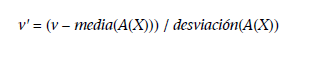

Para cada valor de los atributos Atr11 y Atr42, se resta con la media del atributo y lo divides con la desviación estándar del mismo. Esto para cada valor de Atr11 y Atr42.


**Normalización:**

Formula:


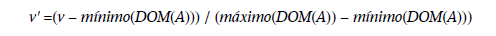

Para cada valor del atributo los restas con el mínimo del atributo y lo divides ente el rango (máximo - mínimo). Esto a cada valor de Atr20 y Atr39.

A continuación nos apoyamos en Python para poder mostrar una tabla con los resultados ya aplicados.


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Cargar los datos del archivo CSV
file_path = '/content/SMALL-1.CSV'
data = pd.read_csv('SMALL-1.CSV', sep=';')

# Aplicar escalado: estandarización para Atr11 y Atr42
scaler_standard = StandardScaler()
data[['Atr11', 'Atr42']] = scaler_standard.fit_transform(data[['Atr11', 'Atr42']])

# Aplicar escalado: normalización para Atr20 y Atr39
scaler_minmax = MinMaxScaler()
data[['Atr20', 'Atr39']] = scaler_minmax.fit_transform(data[['Atr20', 'Atr39']])
# Mostrar
data


,Atr11,Atr20,Atr39,Atr42,Class
0,0.697097,1.00,1.00,0.874475,1
1,1.330821,1.00,1.00,0.874475,1
2,-1.204076,0.00,0.00,-1.143544,0
3,0.697097,0.50,1.00,0.874475,1
4,0.697097,1.00,0.75,0.874475,1
5,-1.204076,0.00,0.00,0.874475,0
6,-0.570352,0.00,0.00,-0.470871,0
7,-0.570352,0.00,0.00,-1.143544,0
8,-1.204076,0.00,0.00,-1.816217,0
9,1.330821,0.75,1.00,0.201802,1


Según lo que hemos visto vamos a explicar la estandarización y normalización según lo resultados anteriores.

**b) Utilizad K-Means nítido para categorizar los datos de este archivo en dos categorías. Mostrad claramente y justificad los pasos y, al final, indicad también de forma muy clara qué ejemplos hay dentro de cada categoría.**

Para categorizar los datos en dos grupos se aplica el algoritmo K-Means nítido, el cual es una técnica de aprendizaje no supervisado que tiene de objetivo agrupar elementos parecidas entre sí, basándose en las distancias entre ellos.

Como el objetivo es separar el conjunto en dos categorías, se ha asignado clusters k=2. El algoritmo parte de dos puntos iniciales llamados centroides (uno por cada grupo) y a partir de ellos sigue los siguientes pasos:


*   Asignación de ejemplos a los clusters, es decir cada ejemplo se compara con los centroides y se asigna al grupo cuyo centro esté más cerca.

Para calcular esta cercanía se utiliza la distancia euclídea que mide lo diferente que es un ejemplo respecto al centro. Su fórmula es:

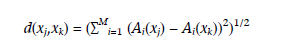

O para simplificar:

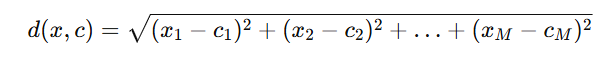


*   Reubicación de los centroides, es decir una vez repartidos los ejemplos calculamos la media de todos los puntos en cada grupo y esa media pasa a ser el nuevo centroide. Esto se repite hasta que los grupos ya no cambian

El resultado final del algoritmo es una asignación clara de cada ejemplo a uno de los dos grupos.

Para comenzar se definen dos centroides iniciales tomando valores de los dos primeros ejemplos de nuestro conjunto de datos trabajado. Así tenemos:
*   Centroide C1 (p1) (del ejemplo 0 de nuestros conjunto de datos): Atr11 = 0.697097, Atr20 = 1.00, Atr39= 1.00, Atr42 = 0.874475
*   Centroide C2 (p2) (del ejemplo 1 de nuestros conjuntos de datos): Atr11=1.330821, Atr20 = 1.00, Atr39=1.00, Atr42=0.874475

Como se puede observar ambos centroides comparten los mismos valores a excepción de Atr11.

Una vez definidos los centroides iniciales procedemos a calcular la distancia euclídea desde cada ejemplo del conjunto de ambos centroides. Recuperamos la fórmula:

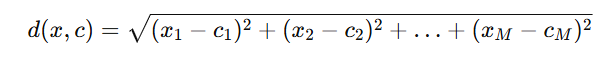

Cuando aplicamos esta fórmula a nuestro ejercicio x es un ejemplo concreto del conjunto de datos, es decir una fila de la tabla que contiene los valores en cada uno de los atributos.
Por ejemplo, el Ejemplo 0 tiene estos valores: (0.697097, 1.00, 1.00, 0.874475)
Por otro lado c es un centroide, un punto que representa el centro de un cluster. Tiene también un valor por cada atributo. Por ejemplo en centroide 1: (0.697097, 1.00, 1.00, 0.874475)
En xi es el valor del atributo de x. En el ejemplo 0, x1 es 0.697097 que es el valor de Atr11, x2 es 1.00 y así sucesivamente.
En ci es el valor del atributo del centroide c. Para el centroide 1, c1 es 0.697097 que es el valor de Atr11, c2 es 1.00 y así sucesivamente.

Si vamos aplicando la fórmula, por ejemplo a Ejemplo 0 (0.697097, 1.00, 1.00, 0.874475) vemos que en distancia a C1 su resultado será 0 y en distancia a C2 su resultado será 0.633724. Por lo tanto se le asignará C1 porque está más cerca.

Ejemplo 1 (1.330821, 1.00, 1.00, 0.874475)
Vemos que en distancia a C1 su resultado será 0.633724 y en distancia a C2 su resultado será 0. Por lo tanto, se le asignará a C2 porque está más cerca.

Ejemplo 2 (−1.204076, 0.00, 0.00, −1.143544)
Vemos que en distancia a C1 su resultado será 3.112371 y en distancia a C2 su resultado será 3.535265. Por lo tanto, se le asignará a C1 porque está más cerca.

Ejemplo 3 (0.697097, 0.50, 1.00, 0.874475)
Vemos que en distancia a C1 su resultado será 0.500000 y en distancia a C2 su resultado será 0.807221. Por lo tanto, se le asignará a C1 porque está más cerca.

Ejemplo 4 (0.697097, 1.00, 0.75, 0.874475)
Vemos que en distancia a C1 su resultado será 0.250000 y en distancia a C2 su resultado será 0.681254. Por lo tanto, se le asignará a C1 porque está más cerca.

Ejemplo 5 (−1.204076, 0.00, 0.00, 0.874475)
Vemos que en distancia a C1 su resultado será 2.369485 y en distancia a C2 su resultado será 2.902706. Por lo tanto, se le asignará a C1 porque está más cerca.

Ejemplo 6 (−0.570352, 0.00, 0.00, −0.470871)
Vemos que en distancia a C1 su resultado será 2.327312 y en distancia a C2 su resultado será 2.724778. Por lo tanto, se le asignará a C1 porque está más cerca.

Ejemplo 7 (−0.570352, 0.00, 0.00, −1.143544)
Vemos que en distancia a C1 su resultado será 2.771069 y en distancia a C2 su resultado será 3.112371. Por lo tanto, se le asignará a C1 porque está más cerca.

Ejemplo 8 (−1.204076, 0.00, 0.00, −1.816217)
Vemos que en distancia a C1 su resultado será 3.585286 y en distancia a C2 su resultado será 3.957969. Por lo tanto, se le asignará a C1 porque está más cerca.

Hemos reubicado los centros de cada grupo calculando la media de los atributos de los ejemplos que pertenecen a cada uno.

Nuevo C1 = (media de los ejemplos 0, 2, 3, 4, 5, 6, 7, 8):

Atr11 = 1.375

Atr20 = 1.250

Atr39 = 1.375

Atr42 = 2.500


Nuevo C2 = (media de los ejemplos 1 y 9):

Atr11 = 4.000

Atr20 = 3.500

Atr39 = 4.000

Atr42 = 3.500

Continuamos asignando los ejemplos a los nuevos centroides, aplicando nuevamente la fórmula de distancia euclídea para buscar el de menor distancia y asignar a cada ejemplo el centroide más cercano.

Ejemplo 0 (3, 4, 4, 4) vemos que en distancia a C1 su resultado será aproximadamente 4.397398 y en distancia a C2 su resultado será aproximadamente 1.224745. Por lo tanto, se le asignará a C2 porque está más cerca.

Ejemplo 1 (4, 4, 4, 4) vemos que en distancia a C1 su resultado será aproximadamente 4.857138 y en distancia a C2 su resultado será aproximadamente 0.707107. Por lo tanto, se le asignará a C2 porque está más cerca.

Ejemplo 2 (0, 0, 0, 1) vemos que en distancia a C1 su resultado será aproximadamente 2.756350 y en distancia a C2 su resultado será aproximadamente 7.104232. Por lo tanto, se le asignará a C1 porque está más cerca.

Ejemplo 3 (3, 2, 4, 4) vemos que en distancia a C1 su resultado será aproximadamente 3.512223 y en distancia a C2 su resultado será aproximadamente 1.870829. Por lo tanto, se le asignará a C2 porque está más cerca.

Ejemplo 4 (3, 4, 3, 4) vemos que en distancia a C1 su resultado será aproximadamente 3.884931 y en distancia a C2 su resultado será aproximadamente 1.581139. Por lo tanto, se le asignará a C2 porque está más cerca.

Ejemplo 5 (0, 0, 0, 4) vemos que en distancia a C1 su resultado será aproximadamente 2.756350 y en distancia a C2 su resultado será aproximadamente 6.672849. Por lo tanto, se le asignará a C1 porque está más cerca.

Ejemplo 6 (1, 0, 0, 2) vemos que en distancia a C1 su resultado será aproximadamente 1.959077 y en distancia a C2 su resultado será aproximadamente 6.284903. Por lo tanto, se le asignará a C1 porque está más cerca.

Ejemplo 7 (1, 0, 0, 1) vemos que en distancia a C1 su resultado será aproximadamente 2.416118 y en distancia a C2 su resultado será aproximadamente 6.595453. Por lo tanto, se le asignará a C1 porque está más cerca.

Ejemplo 8 (0, 0, 0, 0) vemos que en distancia a C1 su resultado será aproximadamente 3.405346 y en distancia a C2 su resultado será aproximadamente 7.514693. Por lo tanto, se le asignará a C1 porque está más cerca.

Ejemplo 9 (4, 3, 4, 3) vemos que en distancia a C1 su resultado será aproximadamente 4.134004 y en distancia a C2 su resultado será aproximadamente 0.707107. Por lo tanto, se le asignará a C2 porque está más cerca.

La clasificación ha variado con respecto la iteración anterior por lo que volvemos a iterar y realizar el mismo procedimiento.

Continuamos asignando los ejemplos a los nuevos centroides, aplicando nuevamente la fórmula de distancia euclídea para buscar el de menor distancia y asignar a cada ejemplo el centroide más cercano.


Nuevo Centroide C1 (media de ejemplos 2, 5, 6, 7, 8)

Atr11 = -0.570352

Atr20 = 0.125000

Atr39 = 0.166667

Atr42 = -0.582983

Nuevo Centroide C2 (media de ejemplos 0, 1, 3, 4, 9)

Atr11 = 0.855528

Atr20 = 0.875000

Atr39 = 0.937500

Atr42 = 0.874475

Ejemplo 0 (0.697097, 1.00, 1.00, 0.874475) vemos que en distancia a C1 su resultado será aproximadamente 2.424893 y en distancia a C2 su resultado será aproximadamente 0.188431. Por lo tanto, se le asignará a C2 porque está más cerca.

Ejemplo 1 (1.330821, 1.00, 1.00, 0.874475) vemos que en distancia a C1 su resultado será aproximadamente 2.869199 y en distancia a C2 su resultado será aproximadamente 0.484883. Por lo tanto, se le asignará a C2 porque está más cerca.

Ejemplo 2 (-1.204076, 0.00, 0.00, -1.143544) vemos que en distancia a C1 su resultado será aproximadamente 0.774530 y en distancia a C2 su resultado será aproximadamente 3.450140. Por lo tanto, se le asignará a C1 porque está más cerca.

Ejemplo 3 (0.697097, 0.50, 1.00, 0.874475) vemos que en distancia a C1 su resultado será aproximadamente 2.267243 y en distancia a C2 su resultado será aproximadamente 0.391336. Por lo tanto, se le asignará a C2 porque está más cerca.

Ejemplo 4 (0.697097, 1.00, 0.75, 0.874475) vemos que en distancia a C1 su resultado será aproximadamente 2.208838 y en distancia a C2 su resultado será aproximadamente 0.241432. Por lo tanto, se le asignará a C2 porque está más cerca.

Ejemplo 5 (-1.204076, 0.00, 0.00, 0.874475) vemos que en distancia a C1 su resultado será aproximadamente 1.548956 y en distancia a C2 su resultado será aproximadamente 2.070155. Por lo tanto, se le asignará a C1 porque está más cerca.

Ejemplo 6 (-0.570352, 0.00, 0.00, -0.470871) vemos que en distancia a C1 su resultado será aproximadamente 0.299869 y en distancia a C2 su resultado será aproximadamente 2.917535. Por lo tanto, se le asignará a C1 porque está más cerca.

Ejemplo 7 (-0.570352, 0.00, 0.00, -1.143544) vemos que en distancia a C1 su resultado será aproximadamente 0.576561 y en distancia a C2 su resultado será aproximadamente 3.405456. Por lo tanto, se le asignará a C1 porque está más cerca.

Ejemplo 8 (-1.204076, 0.00, 0.00, -1.816217) vemos que en distancia a C1 su resultado será aproximadamente 1.014567 y en distancia a C2 su resultado será aproximadamente 4.059377. Por lo tanto, se le asignará a C1 porque está más cerca.

Ejemplo 9 (1.330821, 0.75, 1.00, 0.201802) vemos que en distancia a C1 su resultado será aproximadamente 2.719303 y en distancia a C2 su resultado será aproximadamente 0.633583. Por lo tanto, se le asignará a C2 porque está más cerca.

Observamos que no se ha producido ningún cambio, por lo que se ha alcanzado la convergencia. Por tanto, esta es la clasificación definitiva proporcionada por el algoritmo K-Means.

Centroide C1 [Ejemplo2, Ejemplo5, Ejemplo6, Ejemplo7, Ejemplo8]

Centroide C2 [Ejemplo0, Ejemplo1, Ejemplo3, Ejemplo4, Ejemplo9]

Nos apoyamos a continuación en Python para visualizar en tabla los resultados ya obtenidos.






In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances
from sklearn.preprocessing import StandardScaler, MinMaxScaler

#Cargar el archico CSV
file_path = '/content/SMALL-1.CSV'
data = pd.read_csv('SMALL-1.CSV', sep=';')


# Estandarización para Atr11 y Atr42
scaler_standard = StandardScaler()
data[['Atr11', 'Atr42']] = scaler_standard.fit_transform(data[['Atr11', 'Atr42']])

# Normalización para Atr20 y Atr39
scaler_minmax = MinMaxScaler()
data[['Atr20', 'Atr39']] = scaler_minmax.fit_transform(data[['Atr20', 'Atr39']])

#Seleccionar características que no sea de la Clase
X = data.drop(columns=['Class'])

#Definir los centroids iniciales
centroid1 = X.iloc[0].values
centroid2 = X.iloc[1].values
centroids = np.array([centroid1, centroid2])
contador=0
for i, centroid in enumerate (centroids, 1):
  print(f'Centroid{i}: {centroid}')
print()

# Calcular las distancias
distances = pairwise_distances(X, centroids, metric='euclidean')
assigned_centroids = np.argmin(distances, axis=1)

# Mostrar las distancias y centroides asignados
results = pd.DataFrame({
    'EJEMPLO': range(1, len(X) + 1),
    'CENTROID1': distances[:, 0],
    'CENTROID2': distances[:, 1],
    'ASSIGNED': ['CENTROID1' if c == 0 else 'CENTROID2' for c in assigned_centroids]
})
print(results)

# Calcular nuevos centroids
print()

new_centroid1 = X[assigned_centroids == 0].mean(axis=0).values
new_centroid2 = X[assigned_centroids == 1].mean(axis=0).values

print(f'Nuevo Centroid 1= {new_centroid1}')
print(f'Nuevo Centroid 2= {new_centroid2}')
print()

#Volver a calcular distancias con los nuevos centroides
centroids = np.array([new_centroid1, new_centroid2])

distances = pairwise_distances(X, centroids, metric='euclidean')
assigned_centroids = np.argmin(distances, axis=1)

# Mostrar las distancias y centroides asignados
results = pd.DataFrame({
    'EJEMPLO': range(1, len(X) + 1),
    'CENTROID1': distances[:, 0],
    'CENTROID2': distances[:, 1],
    'ASSIGNED': ['CENTROID1' if c == 0 else 'CENTROID2' for c in assigned_centroids]
})
print(results)

# Mostrar los ejemplos asignados a cada centroide
cluster1_examples = results[results['ASSIGNED'] == 'CENTROID1']['EJEMPLO'].tolist()
cluster2_examples = results[results['ASSIGNED'] == 'CENTROID2']['EJEMPLO'].tolist()

print(f"\nEjemplos en CENTROID1: {cluster1_examples}")
print(f"Ejemplos en CENTROID2: {cluster2_examples}")





Centroid1: [0.69709668 1.         1.         0.87447463]
Centroid2: [1.33082093 1.         1.         0.87447463]

   EJEMPLO     CENTROID1  CENTROID2   ASSIGNED
0        1  2.980232e-08   0.633724  CENTROID1
1        2  6.337243e-01   0.000000  CENTROID2
2        3  3.112371e+00   3.535265  CENTROID1
3        4  5.000000e-01   0.807221  CENTROID1
4        5  2.500000e-01   0.681254  CENTROID1
5        6  2.369485e+00   2.902706  CENTROID1
6        7  2.327312e+00   2.724778  CENTROID1
7        8  2.771069e+00   3.112371  CENTROID1
8        9  3.585286e+00   3.957969  CENTROID1
9       10  9.573897e-01   0.717627  CENTROID2

Nuevo Centroid 1= [-0.33270523  0.3125      0.34375    -0.13453456]
Nuevo Centroid 2= [1.33082093 0.875      1.         0.53813824]

   EJEMPLO  CENTROID1  CENTROID2   ASSIGNED
0        1   1.726821   0.728254  CENTROID2
1        2   2.165350   0.358814  CENTROID2
2        3   1.411810   3.319545  CENTROID1
3        4   1.595121   0.809539  CENTROID2
4        5   1

---

**c) Aplicad el algoritmo PCA para reducir la dimensionalidad del conjunto anterior conservando el 95% de la varianza.**

---

Partimos del conjunto de datos que ya ha sido tratado (escalado) en el apartado 1a, mediante estandarización y normalización, según correspondiera. De ese tratamiento, se obtiene una matriz de datos estandarizados de dimensión 10x4. Cada fila representa un ejemplo y cada columna un atributo.

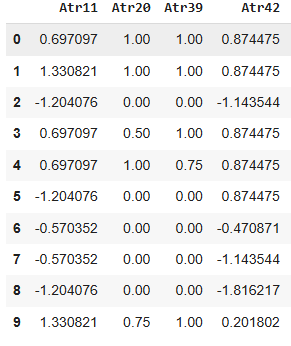

El primer paso del algoritmo PCA es contruir la matriz covarianza de las variables del conjunto. Esta matriz permite analizar el grado de relación entre atributos. Si dos atributos aumentan o disminuyen juntos, tendrán covarianza postiva, si uno sube mientras el otro baja, será negativa y si no tienen relación será cercana a 0.

En nuestro caso como tenemos cuatro atributos lamatriz de covarianza es de dimensión 4x4.



Fórmula de la covarianza entre dos atributos:

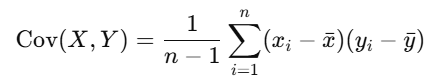

Para cada fila de dataset (cada ejemplo), restamos los valores de AtrX su media. Multiplicamos esas dos diferencias entre ellas, sumamos y dividimos por n - 1 (en nuestro caso 9)

Recuperamos las medias de nuestros atributos para tenerlas a mano y los valores de cada atributo:

*   **Atr11**

*   Media: 1.90

*   **Atr20**

*   Media: 1.70

*   **Atr39**

*   Media: 1.90

*   **Atr42**

*   Media: 2.70

*   **Class**

*   Media: 0.5

Y los datos:

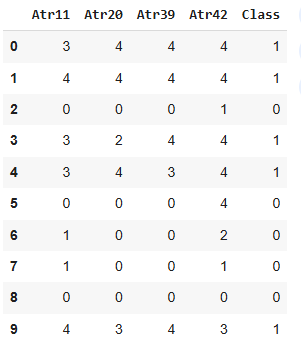

Aplicamos la fórmula. Comenzamos con todos Los Atr11.

Cov(Atr11, Atr11):
Media: 0.0 (estandarizado)

(0.697097 - 0)^2 = 0.4860

(1.330821 - 0)^2 = 1.7711

(-1.204076 - 0)^2 = 1.4498

(0.697097 - 0)^2 = 0.4860

(0.697097 - 0)^2 = 0.4860

(-1.204076 - 0)^2 = 1.4498

(-0.570352 - 0)^2 = 0.3253

(-0.570352 - 0)^2 = 0.3253

(-1.204076 - 0)^2 = 1.4498

(1.330821 - 0)^2 = 1.7711

(0.4860 + 1.7711 + 1.4498 + 0.4860 + 0.4860 + 1.4498 + 0.3253 + 0.3253 + 1.4498 + 1.7711)/10-1= 1.111


Cov(Atr11, Atr20):
MediaAtr11: 0.0
MediaAtr42: 0.425
(0.6971 - 0.0)(1.00 - 0.425) = 0.4008

(1.3308 - 0.0)(1.00 - 0.425) = 0.7652

(-1.2041 - 0.0)(0.00 - 0.425) = 0.5117

(0.6971 - 0.0)(0.50 - 0.425) = 0.0523

(0.6971 - 0.0)(1.00 - 0.425) = 0.4008

(-1.2041 - 0.0)(0.00 - 0.425) = 0.5117

(-0.5704 - 0.0)(0.00 - 0.425) = 0.2424

(-0.5704 - 0.0)(0.00 - 0.425) = 0.2424

(-1.2041 - 0.0)(0.00 - 0.425) = 0.5117

(1.3308 - 0.0)(0.75 - 0.425) = 0.4325

(0.4008 + 0.7652 + 0.5117 + 0.0523 + 0.4008 + 0.5117 + 0.2424 + 0.2424 + 0.5117 + 0.4325)/10-1= 0.452

Cov(Atr11, Atr39):
Media11: 0.0
Media39: 0.375
(0.697097 - 0.0)(1.00 - 0.375) = 0.435686

(1.330821 - 0.0)(1.00 - 0.375) = 0.831763

(-1.204076 - 0.0)(0.00 - 0.375) = 0.451529

(0.697097 - 0.0)(1.00 - 0.375) = 0.435686

(0.697097 - 0.0)(0.75 - 0.375) = 0.261411

(-1.204076 - 0.0)(0.00 - 0.375) = 0.451529

(-0.570352 - 0.0)(0.00 - 0.375) = 0.213882

(-0.570352 - 0.0)(0.00 - 0.375) = 0.213882

(-1.204076 - 0.0)(0.00 - 0.375) = 0.451529

(1.330821 - 0.0)(1.00 - 0.375) = 0.831763

(0.435686 + 0.831763 + 0.451529 + 0.435686 + 0.261411 + 0.451529 + 0.213882 + 0.213882 + 0.451529 + 0.831763)/10-1= 0.50874


Cov(Atr11, Atr42):
Media11: 0.0
Media42: 0.0
(0.697097 - 0.0)(0.874475 - 0.0) = 0.609408

(1.330821 - 0.0)(0.874475 - 0.0) = 1.164286

(-1.204076 - 0.0)(-1.143544 - 0.0) = 1.377256

(0.697097 - 0.0)(0.874475 - 0.0) = 0.609408

(0.697097 - 0.0)(0.874475 - 0.0) = 0.609408

(-1.204076 - 0.0)(0.874475 - 0.0) = -1.053116

(-0.570352 - 0.0)(-0.470871 - 0.0) = 0.268621

(-0.570352 - 0.0)(-1.143544 - 0.0) = 0.652458

(-1.204076 - 0.0)(-1.816217 - 0.0) = 2.188288

(1.330821 - 0.0)(0.201802 - 0.0) = 0.268703

(0.609408 + 1.164286 + 1.377256 + 0.609408 + 0.609408 − 1.053116 + 0.268621 + 0.652458 + 2.188288 + 0.268703)/10-1= 0.7439

Cov(Atr20, Atr20):
Media20:0.425 (normalizaDO)
(1.00 - 0.425)(1.00 - 0.425) = 0.330625

(1.00 - 0.425)(1.00 - 0.425) = 0.330625

(0.00 - 0.425)(0.00 - 0.425) = 0.180625

(0.50 - 0.425)(0.50 - 0.425) = 0.005625

(1.00 - 0.425)(1.00 - 0.425) = 0.330625

(0.00 - 0.425)(0.00 - 0.425) = 0.180625

(0.00 - 0.425)(0.00 - 0.425) = 0.180625

(0.00 - 0.425)(0.00 - 0.425) = 0.180625

(0.00 - 0.425)(0.00 - 0.425) = 0.180625

(0.75 - 0.425)(0.75 - 0.425) = 0.105625


(0.330625 × 3 + 0.180625 × 5 + 0.005625 + 0.105625 =
0.991875 + 0.903125 + 0.005625 + 0.105625)/10-1= 0.2229

Cov(Atr20, Atr20):
Media20:0.425
Media Atr39 = 0.475

(1.00 - 0.425)(1.00 - 0.475) = 0.330625

(1.00 - 0.425)(1.00 - 0.475) = 0.330625

(0.00 - 0.425)(0.00 - 0.475) = 0.201875

(0.50 - 0.425)(1.00 - 0.475) = 0.0375

(1.00 - 0.425)(0.75 - 0.475) = 0.198375

(0.00 - 0.425)(0.00 - 0.475) = 0.201875

(0.00 - 0.425)(0.00 - 0.475) = 0.201875

(0.00 - 0.425)(0.00 - 0.475) = 0.201875

(0.00 - 0.425)(0.00 - 0.475) = 0.201875

(0.75 - 0.425)(1.00 - 0.475) = 0.172125


(0.330625 × 2 + 0.201875 × 5 + 0.0375 + 0.198375 + 0.172125 =
0.66125 + 1.009375 + 0.0375 + 0.198375 + 0.172125)/10-1= 0.2310

Cov(Atr20, Atr42):
Media20:0.425
Media Atr42 = 0.0

(1.00 - 0.425)(0.874475 - 0.0) = 0.5110

(1.00 - 0.425)(0.874475 - 0.0) = 0.5110

(0.00 - 0.425)(-1.143544 - 0.0) = 0.4865

(0.50 - 0.425)(0.874475 - 0.0) = 0.0656

(1.00 - 0.425)(0.874475 - 0.0) = 0.5110

(0.00 - 0.425)(0.874475 - 0.0) = -0.3711

(0.00 - 0.425)(-0.470871 - 0.0) = 0.2001

(0.00 - 0.425)(-1.143544 - 0.0) = 0.4865

(0.00 - 0.425)(-1.816217 - 0.0) = 0.7719

(0.75 - 0.425)(0.201802 - 0.0) = 0.0651


(0.5110 × 3 + 0.4865 × 2 + 0.0656 + (−0.3711) + 0.2001 + 0.7719 + 0.0651)/10-1= 0.356

Cov(Atr39, Atr39):
Media39= 0.475

(1.00 - 0.475)(1.00 - 0.475) = 0.2756

(1.00 - 0.475)(1.00 - 0.475) = 0.2756

(0.00 - 0.475)(0.00 - 0.475) = 0.2256

(1.00 - 0.475)(1.00 - 0.475) = 0.2756

(0.75 - 0.475)(0.75 - 0.475) = 0.0756

(0.00 - 0.475)(0.00 - 0.475) = 0.2256

(0.00 - 0.475)(0.00 - 0.475) = 0.2256

(0.00 - 0.475)(0.00 - 0.475) = 0.2256

(0.00 - 0.475)(0.00 - 0.475) = 0.2256

(1.00 - 0.475)(1.00 - 0.475) = 0.2756


(0.2756 × 4 + 0.2256 × 5 + 0.0756)/10-1= 0.256

Cov(Atr39, Atr42):
MediaAtr39= 0.475
MediaAtr42= 0.0

(1.00 - 0.475)(0.874475 - 0.0) = 0.4593

(1.00 - 0.475)(0.874475 - 0.0) = 0.4593

(0.00 - 0.475)(-1.143544 - 0.0) = 0.5432

(1.00 - 0.475)(0.874475 - 0.0) = 0.4593

(0.75 - 0.475)(0.874475 - 0.0) = 0.2408

(0.00 - 0.475)(0.874475 - 0.0) = -0.4155

(0.00 - 0.475)(-0.470871 - 0.0) = 0.2237

(0.00 - 0.475)(-1.143544 - 0.0) = 0.5432

(0.00 - 0.475)(-1.816217 - 0.0) = 0.8627

(1.00 - 0.475)(0.201802 - 0.0) = 0.1055


(0.4593 × 3 + 0.5432 × 2 + 0.2408 − 0.4155 + 0.2237 + 0.8627 + 0.1055)/10-1= 0.386

Cov(Atr42, Atr42):
MediaAtr42= 0.0

0.874475 - 0)^2 = 0.7647

(0.874475 - 0)^2 = 0.7647

(-1.143544 - 0)^2 = 1.3077

(0.874475 - 0)^2 = 0.7647

(0.874475 - 0)^2 = 0.7647

(0.874475 - 0)^2 = 0.7647

(-0.470871 - 0)^2 = 0.2217

(-1.143544 - 0)^2 = 1.3077

(-1.816217 - 0)^2 = 3.2990

(0.201802 - 0)^2 = 0.0407


(0.7647 × 4 + 1.3077 × 2 + 0.2217 + 3.2990 + 0.0407 )/10-1= 1.111





Nos apoyamos en Python para visualizar la matriz resultante del proceso que hemos realizado manualmente.






In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

#Cargar el archico CSV
file_path = '/content/SMALL-1.CSV'
data = pd.read_csv('SMALL-1.CSV', sep=';')

# Seleccionar solo las columnas necesarias (sin 'Class')
X = data.drop(columns=['Class']).copy()

# Estandarizar Atr11 y Atr42
scaler_std = StandardScaler()
X[['Atr11', 'Atr42']] = scaler_std.fit_transform(X[['Atr11', 'Atr42']])

# Normalizar Atr20 y Atr39
scaler_minmax = MinMaxScaler()
X[['Atr20', 'Atr39']] = scaler_minmax.fit_transform(X[['Atr20', 'Atr39']])

# Calcular la matriz de covarianza
cov_matrix = np.cov(X.T)

# Crear un DataFrame con nombres de columnas y filas
features = X.columns
cov_df = pd.DataFrame(cov_matrix, index=features, columns=features)

# Mostrar la tabla (sin ace_tools, solo el DataFrame en Colab)
cov_df

,Atr11,Atr20,Atr39,Atr42
Atr11,1.111111,0.452409,0.508740,0.743638
Atr20,0.452409,0.222917,0.220139,0.356890
Atr39,0.508740,0.220139,0.256250,0.386787
Atr42,0.743638,0.356890,0.386787,1.111111


A continuación con esta matriz de covarianza del conjunto de datos ya estandarizado y normalizado, calculamos sus valores propios y autovectores. Cada valor propio indica cuánta varianza del conjunto original se conserva a lo largo del eje definido por su vector propio asociado, de modo que cuanto mayor sea un valor propio, más información retiene ese componente.

En nuestro caso los valores propios y autovectores obtenidos han sido (ordenado de mayor a menor):

PC1
λ₁ ≈ 2.2608
v₁ ≈ (-0.656, -0.289, -0.318, -0.621)

PC2
λ₂ ≈ 0.3951
v₂ ≈ (-0.579, -0.150, -0.190, 0.779)

PC3
λ₃ ≈ 0.0309
v₃ ≈ (-0.414, 0.879, 0.221, -0.085)

PC4
λ₄ ≈ 0.0147
v₄ ≈ (-0.252, -0.348, 0.902, -0.034)


PC1:
(2.2608 ÷ 2.7015) × 100 % ≈ 83.69 %

PC2:
(0.3951 ÷ 2.7015) × 100 % ≈ 14.63 %

PC3:
(0.0309 ÷ 2.7015) × 100 % ≈ 1.14 %

PC4:
(0.0147 ÷ 2.7015) × 100 % ≈ 0.54 %

Para conservar mínimo el 95% de varianza acumulamos los porcentajes PC1 y PC2 ya que la suma de ellos es suficiente para conservar la varianza deseada.



In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np


#Cargar el archico CSV

data = pd.read_csv('SMALL-1.CSV', sep=';')

# Seleccionar características (sin 'Class')
X = data.drop(columns=['Class'])

# Estandarización de los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar PCA
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

# Varianza explicada acumulada
varianza_explicada = np.cumsum(pca.explained_variance_ratio_)
num_components = pca.n_components_

print(f'\n Podemos ver que para llegar a mantener el 95% de la varianza acumulada necesitamos utilizar {num_components} componentes\n')
print("Varianza explicada acumulada:", varianza_explicada)

# Convertir los resultados de PCA en un DataFrame para mejor visualización
pca_columns = [f'PC{i+1}' for i in range(num_components)]
X_pca_df = pd.DataFrame(X_pca, columns=pca_columns)
print("\nDatos proyectados en los componentes principales:")
print(X_pca_df)


 Podemos ver que para llegar a mantener el 95% de la varianza acumulada necesitamos utilizar 2 componentes

Varianza explicada acumulada: [0.8649744  0.96518224]

Datos proyectados en los componentes principales:
        PC1       PC2
0  1.979442  0.045242
1  2.305078 -0.178102
2 -2.132482 -0.193054
3  1.404409  0.259858
4  1.707234  0.159462
5 -1.236364  1.601383
6 -1.508140  0.181748
7 -1.806846 -0.416398
8 -2.431187 -0.791199
9  1.718856 -0.668940


---

**d) Utilizad K-Means nítido sobre el resultado de aplicar PCA en el apartado anterior. Mostrad claramente y justificad los pasos y, al final, indicad también de forma muy clara qué ejemplos hay dentro de cada categoría.**

---

Tras haber reducido nuestro conjunto a dos componentes (PC1 y PC2)que mantienen el 95% de varianza, ahora agruparemos esas proyecciones con el mismo procedimiento que en el ejercicio 1b.

Disponemos de la tabla del ejercicio previo. Se asigna clusters k=2. Sigue los siguientes pasos:

*   Asignación de ejemplos a los clusters, es decir cada ejemplo se compara con los centroides y se asigna al grupo cuyo centro esté más cerca.

Para calcular esta cercanía se utiliza la distancia euclídea que mide lo diferente que es un ejemplo respecto al centro. Su fórmula es:

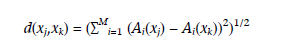

O para simplificar:

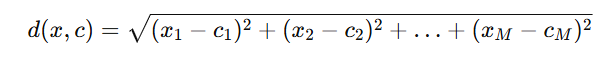


*   Reubicación de los centroides, es decir una vez repartidos los ejemplos calculamos la media de todos los puntos en cada grupo y esa media pasa a ser el nuevo centroide. Esto se repite hasta que los grupos ya no cambian

El resultado final del algoritmo es una asignación clara de cada ejemplo a uno de los dos grupos.

Para comenzar se definen dos centroides iniciales tomando valores de los dos primeros ejemplos de nuestro conjunto de datos trabajado. Así tenemos:

*   Centroide C1 (PC1) (p1)

*   Centroide C2 (PC2) (p2)


Una vez definidos los centroides iniciales procedemos a calcular la distancia euclídea desde cada ejemplo del conjunto de ambos centroides. Recuperamos la fórmula:

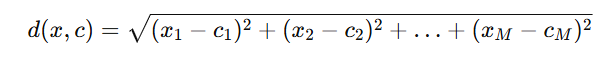

Cuando aplicamos esta fórmula a nuestro ejercicio x es un ejemplo concreto del conjunto de datos, es decir una fila de la tabla que contiene los valores en cada uno de los atributos.

Vamos aplicando la fórmula.

Ejemplo 0 (1.979442,0.045242) vemos que en distancia a C1 su resultado será 0 y en distancia a C2 su resultado será 0.394. Por lo tanto se le asignará C1 porque está más cerca.

Ejemplo 1 (2.305078,−0.178102)
Vemos que en distancia a C1 su resultado será 0.394 y en distancia a C2 su resultado será 0. Por lo tanto, se le asignará a C2 porque está más cerca.

Ejemplo 2 (−2.132482,−0.193054)
Vemos que en distancia a C1 su resultado será 4.116 y en distancia a C2 su resultado será 4.444. Por lo tanto, se le asignará a C1 porque está más cerca.

Ejemplo 3 (1.404409,0.259858)
Vemos que en distancia a C1 su resultado será 0.614 y en distancia a C2 su resultado será 1.003. Por lo tanto, se le asignará a C1 porque está más cerca.

Ejemplo 4 (0.697097, 1.00, 0.75, 0.874475)
Vemos que en distancia a C1 su resultado será 0.295 y en distancia a C2 su resultado será 0.686. Por lo tanto, se le asignará a C1 porque está más cerca.

Ejemplo 5 (−1.236364,1.601383)
Vemos que en distancia a C1 su resultado será 3.573 y en distancia a C2 su resultado será 3.966. Por lo tanto, se le asignará a C1 porque está más cerca.

Ejemplo 6 (−1.508140,0.181748)
Vemos que en distancia a C1 su resultado será 3.489 y en distancia a C2 su resultado será 3.828. Por lo tanto, se le asignará a C1 porque está más cerca.

Ejemplo 7 (−1.806846,−0.416398)
Vemos que en distancia a C1 su resultado será 3.814 y en distancia a C2 su resultado será 4.121. Por lo tanto, se le asignará a C1 porque está más cerca.

Ejemplo 8 (−2.431187,−0.791199)
Vemos que en distancia a C1 su resultado será 4.493 y en distancia a C2 su resultado será 4.776. Por lo tanto, se le asignará a C1 porque está más cerca.

Ejemplo 9 (1.718856,−0.668940)
Vemos que en distancia a C1 su resultado será 0.759 y en distancia a C2 su resultado será 0.764. Por lo tanto, se le asignará a C1 porque está más cerca.

Hemos reubicado los centros de cada grupo calculando la media de los atributos de los ejemplos que pertenecen a cada uno.

Nuevo C1 = (media de los ejemplos 0, 2, 3, 4, 5, 6, 7, 8, 9):

PC1 = −0.25612

PC2 = 0.01979


Nuevo C2 = (media del ejemplo 1):

PC1 = 2.305078

PC2 = −0.178102

Continuamos asignando los ejemplos a los nuevos centroides, aplicando nuevamente la fórmula de distancia euclídea para buscar el de menor distancia y asignar a cada ejemplo el centroide más cercano.

Ejemplo 0 (1.979442,0.045242) vemos que en distancia a C1 su resultado será aproximadamente 2.2363 y en distancia a C2 su resultado será aproximadamente 0.3948. Por lo tanto, se le asignará a C2 porque está más cerca.

Ejemplo 1 (2.305078,−0.178102) vemos que en distancia a C1 su resultado será aproximadamente 2.57 y en distancia a C2 su resultado será aproximadamente 0.707107. Por lo tanto, se le asignará a C2 porque está más cerca.

Ejemplo 2 (−2.132482,−0.193054) vemos que en distancia a C1 su resultado será aproximadamente 1.888 y en distancia a C2 su resultado será aproximadamente 4.444. Por lo tanto, se le asignará a C1 porque está más cerca.

Ejemplo 3 (1.404409,0.259858) vemos que en distancia a C1 su resultado será aproximadamente 1.678 y en distancia a C2 su resultado será aproximadamente 1.001. Por lo tanto, se le asignará a C2 porque está más cerca.

Ejemplo 4 (1.707234,0.159462) vemos que en distancia a C1 su resultado será aproximadamente 1.967 y en distancia a C2 su resultado será aproximadamente 0.686. Por lo tanto, se le asignará a C2 porque está más cerca.

Ejemplo 5 (−1.236364,1.601383) vemos que en distancia a C1 su resultado será aproximadamente 1.861 y en distancia a C2 su resultado será aproximadamente 3.966. Por lo tanto, se le asignará a C1 porque está más cerca.

Ejemplo 6 (−1.508140,0.181748) vemos que en distancia a C1 su resultado será aproximadamente 1.262 y en distancia a C2 su resultado será aproximadamente 3.83. Por lo tanto, se le asignará a C1 porque está más cerca.

Ejemplo 7 (−1.806846,−0.416398) vemos que en distancia a C1 su resultado será aproximadamente 1.610 y en distancia a C2 su resultado será aproximadamente 4.121. Por lo tanto, se le asignará a C1 porque está más cerca.

Ejemplo 8 (−2.431187,−0.791199) vemos que en distancia a C1 su resultado será aproximadamente 2.323 y en distancia a C2 su resultado será aproximadamente 4.776. Por lo tanto, se le asignará a C1 porque está más cerca.

Ejemplo 9 (1.718856,−0.668940) vemos que en distancia a C1 su resultado será aproximadamente 2.091 y en distancia a C2 su resultado será aproximadamente 0.765. Por lo tanto, se le asignará a C2 porque está más cerca.

La clasificación ha variado con respecto la iteración anterior por lo que volvemos a iterar y realizar el mismo procedimiento.

Continuamos asignando los ejemplos a los nuevos centroides, aplicando nuevamente la fórmula de distancia euclídea para buscar el de menor distancia y asignar a cada ejemplo el centroide más cercano.


Nuevo Centroide C1 (media de ejemplos 2, 5, 6, 7, 8)

PC1 = -1.823003

PC2 = 0.076496

Nuevo Centroide C2 (media de ejemplos 0, 1, 3, 4, 9)

PC1 = 1.823003

PC2 = -0.076496


Ejemplo 0 (1.979442,0.045242) vemos que en distancia a C1 su resultado será aproximadamente 3.80 y en distancia a C2 su resultado será aproximadamente 0.20. Por lo tanto, se le asignará a C2 porque está más cerca.

Ejemplo 1 (2.305078,−0.178102) vemos que en distancia a C1 su resultado será aproximadamente 4.136 y en distancia a C2 su resultado será aproximadamente 0.492. Por lo tanto, se le asignará a C2 porque está más cerca.

Ejemplo 2 (−2.132482,−0.193054) vemos que en distancia a C1 su resultado será aproximadamente 0.41 y en distancia a C2 su resultado será aproximadamente 3.96. Por lo tanto, se le asignará a C1 porque está más cerca.

Ejemplo 3 (1.404409,0.259858) vemos que en distancia a C1 su resultado será aproximadamente 3.234 y en distancia a C2 su resultado será aproximadamente 0.537. Por lo tanto, se le asignará a C2 porque está más cerca.

Ejemplo 4 (1.707234,0.159462) vemos que en distancia a C1 su resultado será aproximadamente 3.53 y en distancia a C2 su resultado será aproximadamente 0.263. Por lo tanto, se le asignará a C2 porque está más cerca.

Ejemplo 5 (−1.236364,1.601383) vemos que en distancia a C1 su resultado será aproximadamente 1.63 y en distancia a C2 su resultado será aproximadamente 3.49. Por lo tanto, se le asignará a C1 porque está más cerca.

Ejemplo 6 (−1.508140,0.181748) vemos que en distancia a C1 su resultado será aproximadamente 0.33 y en distancia a C2 su resultado será aproximadamente 3.34. Por lo tanto, se le asignará a C1 porque está más cerca.

Ejemplo 7 (−1.806846,−0.416398) vemos que en distancia a C1 su resultado será aproximadamente 0.49 y en distancia a C2 su resultado será aproximadamente 3.65. Por lo tanto, se le asignará a C1 porque está más cerca.

Ejemplo 8 (−2.431187,−0.791199) vemos que en distancia a C1 su resultado será aproximadamente 1.06 y en distancia a C2 su resultado será aproximadamente 4.31. Por lo tanto, se le asignará a C1 porque está más cerca.

Ejemplo 9 (1.718856,−0.668940) vemos que en distancia a C1 su resultado será aproximadamente 3.62 y en distancia a C2 su resultado será aproximadamente 0.60. Por lo tanto, se le asignará a C2 porque está más cerca.

Observamos que no se ha producido ningún cambio, por lo que se ha alcanzado la convergencia. Por tanto, esta es la clasificación definitiva proporcionada por el algoritmo K-Means.

Centroide C1 [Ejemplo2, Ejemplo5, Ejemplo6, Ejemplo7, Ejemplo8]

Centroide C2 [Ejemplo0, Ejemplo1, Ejemplo3, Ejemplo4, Ejemplo9]

Nos apoyamos a continuación en Python para visualizar en tabla los resultados ya obtenidos.


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import pairwise_distances

# Cargar los datos
data = pd.read_csv("SMALL-1.CSV", sep=';')

# Eliminar la columna de clase
X = data.drop(columns=['Class'])

# Escalado: estandarizar todas las columnas para PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar PCA y quedarse solo con 2 componentes
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Convertir a DataFrame para mejor manejo
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])

# Fijar centroides iniciales: ejemplo 0 y 1 como en 1b
centroid1 = pca_df.iloc[0].values
centroid2 = pca_df.iloc[1].values
centroids = np.array([centroid1, centroid2])

# Primera iteración
distances = pairwise_distances(pca_df, centroids, metric='euclidean')
assigned_centroids = np.argmin(distances, axis=1)

results_iter1 = pd.DataFrame({
    'Ejemplo': range(1, len(pca_df) + 1),
    'Dist_C1': distances[:, 0],
    'Dist_C2': distances[:, 1],
    'Asignado': ['C1' if c == 0 else 'C2' for c in assigned_centroids]
})

# Mostrar resultados de la primera iteración
print("Iteración 1:")
print(results_iter1)

# Recalcular centroides con los grupos actuales
new_centroid1 = pca_df[assigned_centroids == 0].mean().values
new_centroid2 = pca_df[assigned_centroids == 1].mean().values
centroids = np.array([new_centroid1, new_centroid2])

# Segunda iteración
distances = pairwise_distances(pca_df, centroids, metric='euclidean')
assigned_centroids = np.argmin(distances, axis=1)

results_iter2 = pd.DataFrame({
    'Ejemplo': range(1, len(pca_df) + 1),
    'Dist_C1': distances[:, 0],
    'Dist_C2': distances[:, 1],
    'Asignado': ['C1' if c == 0 else 'C2' for c in assigned_centroids]
})

# Mostrar resultados de la segunda iteración
print("\nIteración 2:")
print(results_iter2)

# Tercera iteración (para confirmar convergencia)
new_centroid1 = pca_df[assigned_centroids == 0].mean().values
new_centroid2 = pca_df[assigned_centroids == 1].mean().values
centroids = np.array([new_centroid1, new_centroid2])

distances = pairwise_distances(pca_df, centroids, metric='euclidean')
assigned_centroids = np.argmin(distances, axis=1)

results_iter3 = pd.DataFrame({
    'Ejemplo': range(1, len(pca_df) + 1),
    'Dist_C1': distances[:, 0],
    'Dist_C2': distances[:, 1],
    'Asignado': ['C1' if c == 0 else 'C2' for c in assigned_centroids]
})

# Mostrar resultados de la tercera iteración
print("\nIteración 3 (Final):")
print(results_iter3)





Iteración 1:
   Ejemplo   Dist_C1   Dist_C2 Asignado
0        1  0.000000  0.394869       C1
1        2  0.394869  0.000000       C2
2        3  4.118823  4.437585       C1
3        4  0.613778  1.001506       C1
4        5  0.295200  0.686561       C1
5        6  3.572532  3.963380       C1
6        7  3.490253  3.830160       C1
7        8  3.814327  4.118823       C1
8        9  4.489241  4.775782       C1
9       10  0.760238  0.764577       C1

Iteración 2:
   Ejemplo   Dist_C1   Dist_C2 Asignado
0        1  2.235707  0.394869       C2
1        2  2.568832  0.000000       C2
2        3  1.888395  4.437585       C1
3        4  1.677792  1.001506       C2
4        5  1.968316  0.686561       C2
5        6  1.860731  3.963380       C1
6        7  1.262452  3.830160       C1
7        8  1.610903  4.118823       C1
8        9  2.321340  4.775782       C1
9       10  2.091620  0.764577       C2

Iteración 3 (Final):
   Ejemplo   Dist_C1   Dist_C2 Asignado
0        1  3.802574  0.198225 

---
**e) Calculad la exactitud de K-Means en el apartado b) y en el apartado d). Comparad los resultados, tanto en términos de exactitud como en términos de otros aspectos que hayáis observado durante la realización de los apartados anteriores. Cabe notar que el término "exactitud" se refiere a lo que, en inglés, se denomina "accuracy".**  

---

Al comparar los resultados con y sin PCA, se puede ver que la exactitud en ambas es de 100%. Ya que cada ejmplo de dataset fue asignado al cluster cuyo centroide le correspondía mejor. Es decir, todos los casados y divorciados han sido correctamente clasificados a su cluster tal y como podemos ver en el SMALL-1.

---
### Ejercicio 2  

En este ejercicio construiréis dendrogramas para categorizar los datos de SMALL.csv. Hay que tener en cuenta que se debe trabajar con los datos tratados en el ejercicio anterior, no con los datos originales ni con los resultados de aplicar PCA. Se solicita:  

---
**a) Construya el dendrograma utilizando el enlace simple. Muestre todos los pasos implicados, incluyendo el dendrograma resultante y explique las decisiones tomadas. Indique también de forma muy clara cuál sería la categorización propuesta por el dendrograma.**

---

El enlace simple es una forma de agrupar puntos basada en la distancia mínima entre elementos de distintos grupos.

A continuación, describimos el paso a paso que seguiremos:

1. Usamos los datos del SMALL-1.CSV ya tratados en el ejercicio anterior.

2. Calculamos la matriz de distancias entre todos los ejemplos usando la distancia euclidiana. Esto nos dirá qué tan lejos está cada punto del resto.

3. Buscamos las distancia más corta (excluyendo la diagonal, que siempre es cero).

4. Fusionamos los dos puntos/clusters más cercanos y formamos uno nuevo.

5. Recalculamos las distancias entre el nuevo cluster y el resto.

6. Repetiremos el proceso hasta agrupar todos los puntos y formar el dendograma.







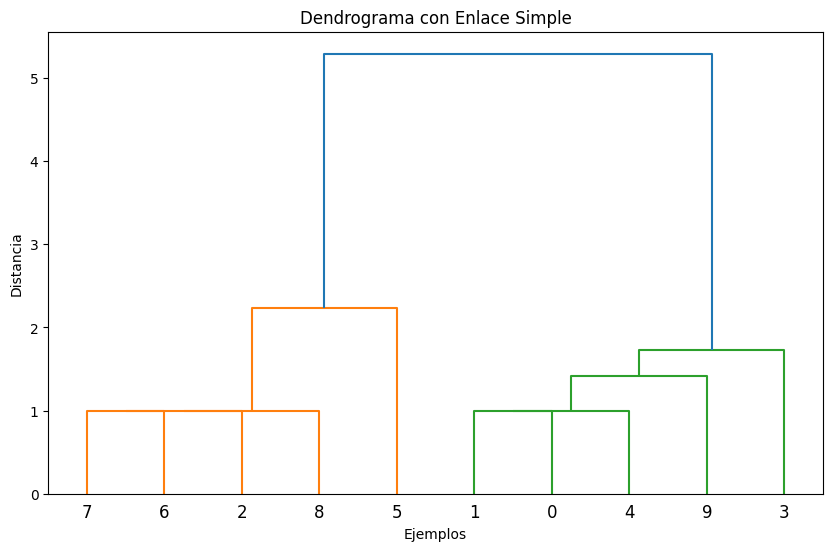

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Cargar el archivo CSV
file_path = '/content/SMALL-1.CSV'
data = pd.read_csv('SMALL-1.CSV', sep=';')

# Aplicar como en el ejercicio 1a
scaler_standard = StandardScaler()
data[['Atr11', 'Atr42']] = scaler_standard.fit_transform(data[['Atr11', 'Atr42']])

scaler_minmax = MinMaxScaler()
data[['Atr20', 'Atr39']] = scaler_minmax.fit_transform(data[['Atr20', 'Atr39']])

# Seleccionar características para agrupar
atributos = data.drop('Class', axis=1)


# Calcula el dendograma con enlace simple
enlace_simple = linkage(X, method='single')

# Dibuja el dendrograma
plt.figure(figsize=(10, 6))
dendrogram(enlace_simple,
           labels=atributos.index.tolist(),
           orientation= 'top',
           distance_sort='descending',
           show_leaf_counts=True)
plt.title('Dendrograma con Enlace Simple')
plt.xlabel('Ejemplos')
plt.ylabel('Distancia')
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from scipy.spatial.distance import pdist, squareform
from sklearn.preprocessing import StandardScaler, MinMaxScaler


# Cargar el archivo CSV
file_path = '/content/SMALL-1.CSV'
data = pd.read_csv('SMALL-1.CSV', sep=';')

# Aplicar como en el ejercicio 1a
scaler_standard = StandardScaler()
data[['Atr11', 'Atr42']] = scaler_standard.fit_transform(data[['Atr11', 'Atr42']])

scaler_minmax = MinMaxScaler()
data[['Atr20', 'Atr39']] = scaler_minmax.fit_transform(data[['Atr20', 'Atr39']])

# Seleccionar características para agrupar
atributos = data.drop('Class', axis=1)

#Calculamos la matriz de distancias entre los ejemplos utilizando la distancia euclídea
matriz_distancias = squareform(pdist(atributos, metric='euclidean'))

# Convertimos la matriz a una DataFrame para trabajar más cómodamente
df_distancias = pd.DataFrame(matriz_distancias, index=atributos.index, columns=atributos.index)

def fusion_clusters(df):
    # Rellenarmos la diagonal con infinito para evitar seleccionarla
    np.fill_diagonal(df.values, np.inf)

    # Buscamos la pareja de elementos con menor distancia
    fila_min, col_min = np.unravel_index(np.argmin(df.values), df.shape)
    distancia_min = df.iloc[fila_min, col_min]

    print(f"\nFusionando los ejemplos {df.index[fila_min]} y {df.index[col_min]} con distancia mínima {distancia_min}\n")

    # Garantizamos que siempre se elimine en orden para evitar errores de índice
    if fila_min > col_min:
        fila_min, col_min = col_min, fila_min

    elem1 = df.index[fila_min]
    elem2 = df.index[col_min]

    # Creamos la nueva distancia entre el nuevo grupo y los restantes (enlace simple = mínimo)
    nueva_distancia = df.apply(lambda fila: min(fila[elem1], fila[elem2]), axis=1)
    nueva_distancia.drop([elem1, elem2], inplace=True)

    # Eliminamos las filas y columnas de los dos elementos fusionados
    df.drop([elem1, elem2], axis=0, inplace=True)
    df.drop([elem1, elem2], axis=1, inplace=True)

    # Añadimos la nueva fila y columna del grupo formado
    nuevo_nombre = f"{elem1}_{elem2}"
    df.loc[nuevo_nombre] = nueva_distancia
    df[nuevo_nombre] = pd.concat([nueva_distancia, pd.Series([np.inf], index=[nuevo_nombre])])
    df.loc[nuevo_nombre, nuevo_nombre] = np.inf

    return df

# Mostramos la matriz inicial
print("Matriz de distancias inicial:")
print(df_distancias)

# Ejecutamos el proceso de agrupación hasta que quede un solo grupo
while len(df_distancias) > 1:
    try:
        df_distancias = fusion_clusters(df_distancias)
        print(df_distancias)
    except Exception as e:
        print("Error al continuar la fusión:", e)
        break

Matriz de distancias inicial:
          0         1         2         3         4         5         6  \
0  0.000000  0.633724  3.112371  0.500000  0.250000  2.369485  2.327312   
1  0.633724  0.000000  3.535265  0.807221  0.681254  2.902706  2.724778   
2  3.112371  3.535265  0.000000  2.989457  3.041275  2.018018  0.924173   
3  0.500000  0.807221  2.989457  0.000000  0.559017  2.205552  2.160181   
4  0.250000  0.681254  3.041275  0.559017  0.000000  2.275293  2.231341   
5  2.369485  2.902706  2.018018  2.205552  2.275293  0.000000  1.487132   
6  2.327312  2.724778  0.924173  2.160181  2.231341  1.487132  0.000000   
7  2.771069  3.112371  0.633724  2.632266  2.690971  2.115184  0.672673   
8  3.585286  3.957969  0.672673  3.479120  3.523745  2.690691  1.487132   
9  0.957390  0.717627  3.130201  0.957390  0.989492  2.905287  2.372645   

          7         8         9  
0  2.771069  3.585286  0.957390  
1  3.112371  3.957969  0.717627  
2  0.633724  0.672673  3.130201  
3  2.632

**MUESTRE LA RESPUESTA EN ESTA CELDA**

---
**b) Construid el dendrograma utilizando el enlace completo. Mostrad todos los pasos implicados, incluyendo el dendrograma resultante y explicad las decisiones tomadas. Indicad también muy claramente cuál sería la categorización propuesta por el dendrograma.**

---

El método de enlace completo agrupa los datos mirando qué tan lejos pueden llegar a estar entre sí los elementos más separados de dos grupos. Nos fijamos en la mayor distancia entre los puntos. Por lo que queremos es calcular la máxima distancia de dos clusters, buscar la pareja de clusters de máxima distancia que sea la más baja en comparación con el resto de pares y unir esos dos clusters.

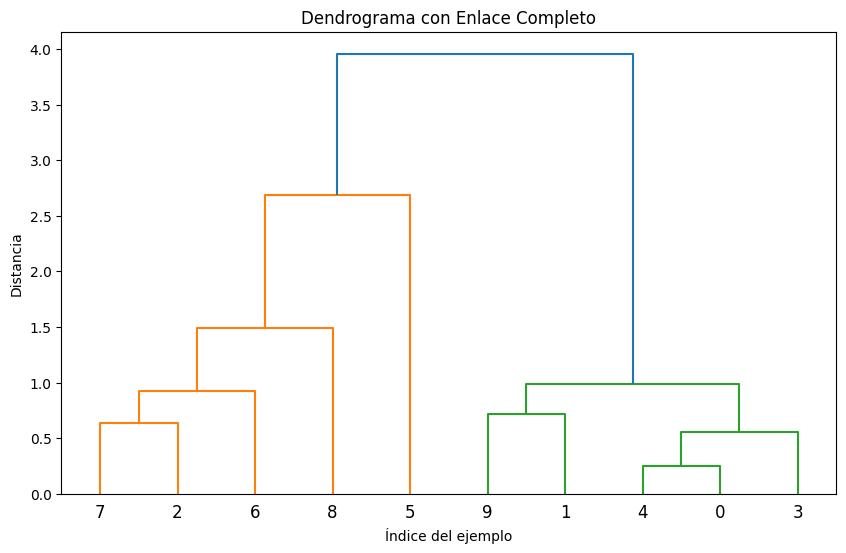


Matriz de distancias inicial:
          0         1         2         3         4         5         6  \
0  0.000000  0.633724  3.112371  0.500000  0.250000  2.369485  2.327312   
1  0.633724  0.000000  3.535265  0.807221  0.681254  2.902706  2.724778   
2  3.112371  3.535265  0.000000  2.989457  3.041275  2.018018  0.924173   
3  0.500000  0.807221  2.989457  0.000000  0.559017  2.205552  2.160181   
4  0.250000  0.681254  3.041275  0.559017  0.000000  2.275293  2.231341   
5  2.369485  2.902706  2.018018  2.205552  2.275293  0.000000  1.487132   
6  2.327312  2.724778  0.924173  2.160181  2.231341  1.487132  0.000000   
7  2.771069  3.112371  0.633724  2.632266  2.690971  2.115184  0.672673   
8  3.585286  3.957969  0.672673  3.479120  3.523745  2.690691  1.487132   
9  0.957390  0.717627  3.130201  0.957390  0.989492  2.905287  2.372645   

          7         8         9  
0  2.771069  3.585286  0.957390  
1  3.112371  3.957969  0.717627  
2  0.633724  0.672673  3.130201  
3  2.63

In [ ]:
import pandas as pd
import numpy as np
from scipy.spatial.distance import pdist, squareform
from sklearn.preprocessing import StandardScaler, MinMaxScaler


# Cargar el archivo CSV
file_path = '/content/SMALL-1.CSV'
data = pd.read_csv('SMALL-1.CSV', sep=';')

# Aplicar como en el ejercicio 1a
scaler_standard = StandardScaler()
data[['Atr11', 'Atr42']] = scaler_standard.fit_transform(data[['Atr11', 'Atr42']])

scaler_minmax = MinMaxScaler()
data[['Atr20', 'Atr39']] = scaler_minmax.fit_transform(data[['Atr20', 'Atr39']])

# Seleccionar características para agrupar
atributos = data.drop('Class', axis=1)

#Calculamos la matriz de distancias entre los ejemplos utilizando la distancia euclídea
matriz_distancias = squareform(pdist(atributos, metric='euclidean'))

# Convertimos la matriz a una DataFrame para trabajar más cómodamente
df_distancias = pd.DataFrame(matriz_distancias, index=atributos.index, columns=atributos.index)

# Generar dendrograma con método de enlace completo
enlace_complete = linkage(atributos, method='complete')

plt.figure(figsize=(10, 6))
dendrogram(enlace_complete,
           orientation='top',
           labels=data.index.to_list(),
           distance_sort='descending',
           show_leaf_counts=True)
plt.title('Dendrograma con Enlace Completo')
plt.xlabel('Índice del ejemplo')
plt.ylabel('Distancia')
plt.show()

def fusion_clusters_completo(df):
    np.fill_diagonal(df.values, np.inf)
    fila_min, col_min = np.unravel_index(np.argmin(df.values), df.shape)
    distancia = df.iloc[fila_min, col_min]

    print(f"\nFusionando los ejemplos {df.index[fila_min]} y {df.index[col_min]} con distancia máxima {distancia}\n")

    if fila_min > col_min:
        fila_min, col_min = col_min, fila_min

    elem1, elem2 = df.index[fila_min], df.index[col_min]

    nueva_distancia = df.apply(lambda fila: max(fila[elem1], fila[elem2]), axis=1)
    nueva_distancia.drop([elem1, elem2], inplace=True)

    df.drop([elem1, elem2], axis=0, inplace=True)
    df.drop([elem1, elem2], axis=1, inplace=True)

    nuevo_nombre = f"{elem1}_{elem2}"
    df.loc[nuevo_nombre] = nueva_distancia
    df[nuevo_nombre] = pd.concat([nueva_distancia, pd.Series([np.inf], index=[nuevo_nombre])])
    df.loc[nuevo_nombre, nuevo_nombre] = np.inf

    return df

print("\nMatriz de distancias inicial:")
print(df_distancias)

while len(df_distancias) > 1:
    try:
        df_distancias = fusion_clusters_completo(df_distancias)
        print(df_distancias)
    except Exception as e:
        print("Error al continuar la fusión:", e)
        break


### Ejercicio 3

En este ejercicio se trabajará con el archivo de datos grande (LARGE.csv) y deberéis programar en Python empleando la biblioteca sklearn además de, probablemente, NumPy.

---
**a) Cargad los datos de LARGE.CSV en un array NumPy y responded a las siguientes preguntas: ¿Cuántos ejemplos hay? ¿De cuántos atributos consta cada ejemplo? ¿Cuántas clases diferentes hay? ¿Cuántos ejemplos hay de cada clase? Mostrad el código que proporciona los valores solicitados. Justificad la respuesta y explicad qué hace el código que proporcionáis. Es importante que trabajéis con NumPy y no con Pandas.**

---

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving LARGE-1.CSV to LARGE-1.CSV


In [ ]:
import numpy as np

# Cargar los datos desde el archivo LARGE-1.CSV
large = np.genfromtxt('LARGE-1.CSV', delimiter=';', skip_header=1)

print(type(large))

#obtenemos número dd ejemplos y atributos
num_ejemplos = large.shape[0]
num_atributos = large.shape[1]

print(f"Este array tiene {num_ejemplos} ejemplos.")
print(f"Cada ejemplo en el dataset consta de {num_atributos} atributos.")

#La última columna del dataset corresponde a la clasificación de cada uno de los ejemplos
classes = large[:, 1]

#Identificamos las clases únicas
unique_classes = np.unique(classes)

#Número totwal de clases distintas
num_unique_classes = len(unique_classes)

print(f"Existen {num_unique_classes} clases diferentes: {unique_classes}.")

# Contamos cuantos ejemplos hay de cada clase
class_count = {class_value: int(np.sum(classes == class_value)) for class_value in unique_classes}

print("Distribución de ejemplos por clase:")
for clase, cantidad in class_count.items():
  print(f"Clase {int(clase)}: {cantidad} ejemplos")

<class 'numpy.ndarray'>
Este array tiene 170 ejemplos.
Cada ejemplo en el dataset consta de 55 atributos.
Existen 5 clases diferentes: [0. 1. 2. 3. 4.].
Distribución de ejemplos por clase:
Clase 0: 59 ejemplos
Clase 1: 23 ejemplos
Clase 2: 28 ejemplos
Clase 3: 38 ejemplos
Clase 4: 22 ejemplos


Hemos cargado los datos usando NumPy y verificado su forma. El array tiene 170 ejemplos.

Cada ejemplo en el dataset tiene 55 atributos incluyendo la clase a la que pertenece.

Hemos extraído la última columna del dataset y calculado las clases únicas presentes del conjunto de datos. Se han identificado 5 clases:

Clase 0: 59 ejemplos
Clase 1: 23 ejemplos
Clase 2: 28 ejemplos
Clase 3: 38 ejemplos
Clase 4: 22 ejemplos

---
**b) Aplicad a los datos de LARGE.CSV el mismo tratamiento que se aplicó en el ejercicio 1. Mostrad el código que realiza este tratamiento así como los 5 primeros atributos de los 10 primeros ejemplos tratados (mostrando tanto los 5 atributos tratados como su clase).**

---

In [ ]:
import numpy as np

# Cargar LARGE-1.CSV
large = np.genfromtxt('LARGE-1.CSV', delimiter=';', skip_header=1)

#Separar atributos menos la última
X = large[:, :-1]
y = large[:, -1]

#Estandarización
scaler = StandardScaler()
X_normalizado = scaler.fit_transform(X)

#Unir los primeros atributos a los ejemplos con sus clases
ejemplos_tratados = np.hstack((X_normalizado[:10, :5], y[:10].reshape(-1, 1)))

# Mostrar resultados
print("Primeros 10 ejemplos tratados (5 primeros atributos + clase):")
for fila in ejemplos_tratados:
  print(fila)

Primeros 10 ejemplos tratados (5 primeros atributos + clase):
[-1.09492181 -1.12880539 -1.25043425 -0.98830369 -0.94704019  0.        ]
[0.75411834 1.60282332 0.87530398 1.01183473 0.89643499 1.        ]
[-0.4785751  -1.12880539 -1.25043425 -0.98830369 -0.94704019  0.        ]
[0.75411834 0.23700896 0.87530398 0.34512192 0.89643499 1.        ]
[-0.4785751  -0.44589822 -1.25043425 -0.98830369 -0.94704019  0.        ]
[ 0.75411834 -0.44589822 -0.54185484 -0.98830369 -0.94704019  0.        ]
[0.75411834 1.60282332 0.87530398 0.34512192 0.89643499 1.        ]
[1.37046505 0.91991614 0.87530398 1.01183473 1.51092672 1.        ]
[-1.09492181 -1.12880539 -1.25043425 -0.98830369 -0.94704019  0.        ]
[-1.09492181 -0.44589822  0.16672457 -0.32159088 -0.94704019  0.        ]


Se aplica el proceso de estandarización excepto a la columna clase, esto con la siguiente formula:

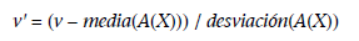

Siendo v el valor original y v' el valor estandarizado.

---

## Recursos

Para realizar esta PAC disponéis de los archivos adjuntos ("SMALL.CSV" y "LARGE.CSV") donde encontraréis los datos con los que tendréis que trabajar.

## Entrega

La entrega debe consistir en un archivo ZIP que contenga el archivo ipynb debidamente completado y ejecutado, así como todos los archivos necesarios para que los profesores podamos visualizar el ipynb. Esto último se refiere, sobre todo, a imágenes, figuras o esquemas que se hayan referenciado en alguna celda *markdown*.

Es muy importante que, una vez descomprimido el ZIP, se pueda abrir y visualizar correctamente el ipynb.

## Criterios de valoración

Los tres ejercicios de esta PAC se valorarán con 10/3 puntos. Cada ejercicio se valorará globalmente, de manera que no hay una puntuación específica para cada apartado.

En todos los casos, además de los resultados obtenidos, se valorará la explicación del trabajo realizado, las evaluaciones aportadas y las justificaciones proporcionadas. Un resultado sin justificar se valorará con cero puntos.

Es muy importante que utilicéis el formato propuesto: responded en las celdas del cuaderno habilitadas para respuestas, no añadáis ni eliminéis ninguna celda y tampoco modifiquéis los contenidos de ninguna celda existente.

## Nota sobre la propiedad intelectual

A menudo es inevitable, al producir una obra multimedia, hacer uso de recursos creados por terceras personas. Por lo tanto, es comprensible hacerlo en el marco de una práctica de los estudios de Ingeniería Informática, siempre y cuando se documente claramente y no suponga plagio en la práctica.

Por tanto, al presentar una práctica que haga uso de recursos ajenos, se debe presentar junto con ella un documento en el que se detallen todos ellos, especificando el nombre de cada recurso, su autor, el lugar donde se obtuvo y su estatus legal: si la obra está protegida por copyright o se acoge a alguna otra licencia de uso (Creative Commons, licencia GNU, GPL, etc.). El estudiante deberá asegurarse de que la licencia que sea no impide específicamente su uso en el marco de la práctica. En caso de no encontrar la información correspondiente, deberá asumir que la obra está protegida por copyright.

Además, deberán adjuntar los archivos originales cuando las obras utilizadas sean digitales, y su código fuente si corresponde.